In [1]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

import os
import pandas as pd

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
!nvidia-smi

Fri Apr 21 17:11:44 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070       WDDM | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P8               20W / 175W|   1995MiB /  8192MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9814233358271297449
 xla_global_id: -1]

In [5]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 
shape=(int(10000),int(10000))
 
with tf.device("/gpu:0"):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

startTime = datetime.now()
with tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)
        
print("\n" * 2)
print("Time taken:", datetime.now() - startTime)
print("\n" * 2)

Instructions for updating:
non-resource variables are not supported in the long term
Device mapping: no known devices.


InvalidArgumentError: Graph execution error:

Detected at node 'random_uniform/RandomUniform' defined at (most recent call last):
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\smhrd\anaconda3\envs\yolov7\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\smhrd\AppData\Local\Temp\ipykernel_196\2175656722.py", line 11, in <module>
      random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
Node: 'random_uniform/RandomUniform'
Cannot assign a device for operation random_uniform/RandomUniform: {{node random_uniform/RandomUniform}} was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device. The requested device appears to be a GPU, but CUDA is not enabled.
	 [[random_uniform/RandomUniform]]

In [3]:
%pwd

'C:\\Users\\smhrd\\yolov7\\finalProject'

In [4]:
%cd ..

C:\Users\smhrd\yolov7


In [5]:
# JPEG파일을 JPG로 변환하는 로직!
# 이게 필요한 이유? 제 실력이 부족해서 JPG로 일괄변환해 분석하는게 편해서 입니다 ^^ 그러려니 해주십시요
# from PIL import Image

# directory1 = 'food_data/images'  # JPEG 파일이 있는 디렉토리의 경로

# for filename in os.listdir(directory1):
#     if filename.endswith('.jpeg'):
#         jpeg_file_path = os.path.join(directory1, filename)
#         jpg_file_path = jpeg_file_path.replace('.jpeg', '.jpg')
#         image = Image.open(jpeg_file_path)
#         image.save(jpg_file_path)

In [6]:
# !pip install ipython

In [7]:
with open('food_data/annotations/01_012_01012002_160273281614671.xml', 'r') as f:
    xml_string = f.read()
    
print(xml_string)

<?xml version='1.0' encoding='UTF-8'?>
<annotation>
	<filename>01_012_01012002_160273281614671.jpg</filename>
	<path>./01/012/01012002/01_012_01012002_160273281614671.jpg</path>
	<source>
		<database>fooddata</database>
	</source>
	<size>
		<width>2560</width>
		<height>1920</height>
		<depth>3</depth>
	</size>
	<object>
		<name>dish</name>
		<bndbox>
			<xmin>454</xmin>
			<ymin>61</ymin>
			<xmax>2221</xmax>
			<ymax>1822</ymax>
		</bndbox>
	</object>
	<object>
		<name>01012002</name>
		<bndbox>
			<xmin>691</xmin>
			<ymin>322</ymin>
			<xmax>1971</xmax>
			<ymax>1520</ymax>
		</bndbox>
	</object>
</annotation>


In [8]:
# gpt가 알려준 로직
# def extract_info_from_xml(xml_file_path):
#     with open(xml_file_path, "r") as f:
#         xml_str = f.read()
    
#     soup = BeautifulSoup(xml_str, "xml")
    
#     image_file_name = soup.find("filename").text
#     image_size_tag = soup.find("size")
#     image_w = int(image_size_tag.find("width").text)
#     image_h = int(image_size_tag.find("height").text)
#     image_c = int(image_size_tag.find("depth").text)

#     bboxes = []
#     for obj in soup.find_all("object"):
#         class_name = obj.find("name").text
#         if class_name not in class_name_to_id_mapping:
#             print(f"클래스 이름이 잘못되었습니다: {class_name}")
#             continue
#         bbox = obj.find("bndbox")
#         xmin = int(bbox.find("xmin").text)
#         ymin = int(bbox.find("ymin").text)
#         xmax = int(bbox.find("xmax").text)
#         ymax = int(bbox.find("ymax").text)
#         bboxes.append({
#             "class": class_name,
#             "xmin": xmin,
#             "ymin": ymin,
#             "xmax": xmax,
#             "ymax": ymax
#         })
        
#     info_dict = {
#         "filename": image_file_name,
#         "image_size": (image_w, image_h, image_c),
#         "bboxes": bboxes
#     }
    
#     return info_dict

In [9]:
# XML 파일에서 원하는 데이터 뽑아오는 함수
def extract_info_from_xml(xml_file):
    xmip = ET.XMLParser(encoding="utf-8")
    # 숫자인코딩 하는 방법? 안되면 삭제
    root = ET.parse(xml_file, parser=xmip).getroot()
    
    # 담아둘 리스트 생성 
    info_dict = {}
    info_dict['bboxes'] = []

    # for문 반복 돌려서 문자열 돌리기
    for elem in root:
        # XML 파일 이름 받아오기
        # 여기서는 숫자가 담길 예정
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # 이미지 사이즈 받아오기
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # 라벨링 처리용 로직
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                
                # yolov7에서 인식시키려면 class네임을 id_라벨링 처리해야합니다.
                # 그렇기에 각각의 사진들을 하나로 묶어서 이름을 제공하고
                # 이를 바탕으로 라벨링 처리를 할 예정이라 이러한 로직을 썼습니다.
                if subelem.tag == "name":
                    if subelem.text.startswith('01'):
                        subelem.text = 'bean-rice'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('06'):
                        subelem.text = 'chicken-galbi'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('08011'):
                        subelem.text = 'stir-fried-octopus'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('08013'):
                        subelem.text = 'pork-chops'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('12'):
                        subelem.text = 'cabbage-for-kimchi'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('dish'):
                        subelem.text = 'dish'
                        bbox["class"] = subelem.text
                    else:
                        bbox["class"] = subelem.text
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [10]:
# 함수가 작동하는지 확인하는 로직
print(extract_info_from_xml('food_data/annotations/01_012_01012002_160273281614671.xml'))

{'bboxes': [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'xmax': 2221, 'ymax': 1822}, {'class': 'bean-rice', 'xmin': 691, 'ymin': 322, 'xmax': 1971, 'ymax': 1520}], 'filename': '01_012_01012002_160273281614671.jpg', 'image_size': (2560, 1920, 3)}


In [11]:
# xml파일에 담긴 모든 xml파일 불러오기
directory = r'C:\Users\smhrd\yolov7\food_data\annotations'
info_dict = []

# for문 돌려서 모든 xml 파일 함수에 기입하고 저장하기.
for filename in os.listdir(directory):
    if filename.endswith('.xml'):
        file_path = os.path.join(directory, filename)
        # 여기에 함수 적용하기
        info=extract_info_from_xml(file_path)
        info_dict.append(info)
print(info_dict)

[{'bboxes': [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'xmax': 2221, 'ymax': 1822}, {'class': 'bean-rice', 'xmin': 691, 'ymin': 322, 'xmax': 1971, 'ymax': 1520}], 'filename': '01_012_01012002_160273281614671.jpg', 'image_size': (2560, 1920, 3)}, {'bboxes': [{'class': 'dish', 'xmin': 204, 'ymin': 1060, 'xmax': 2813, 'ymax': 3662}, {'class': 'bean-rice', 'xmin': 488, 'ymin': 1337, 'xmax': 2586, 'ymax': 3342}], 'filename': '01_012_01012002_160274342946127.jpg', 'image_size': (3024, 4032, 3)}, {'bboxes': [{'class': 'dish', 'xmin': 175, 'ymin': 1038, 'xmax': 2749, 'ymax': 2901}, {'class': 'bean-rice', 'xmin': 452, 'ymin': 1180, 'xmax': 2557, 'ymax': 2524}], 'filename': '01_012_01012002_160274352955042.jpg', 'image_size': (3024, 4032, 3)}, {'bboxes': [{'class': 'dish', 'xmin': 187, 'ymin': 27, 'xmax': 1312, 'ymax': 1065}, {'class': 'bean-rice', 'xmin': 345, 'ymin': 168, 'xmax': 1177, 'ymax': 966}], 'filename': '01_012_01012002_160275059794316.jpg', 'image_size': (1440, 1080, 3)}, {'bboxes':

In [12]:
# train 데이터 프레임화해서 class명 바꿔주기 --> 이렇게 해야 yolov7이 인식할듯?
info_df = pd.DataFrame(info_dict)
info_df

bboxes   
0     [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'x...  \
1     [{'class': 'dish', 'xmin': 204, 'ymin': 1060, ...   
2     [{'class': 'dish', 'xmin': 175, 'ymin': 1038, ...   
3     [{'class': 'dish', 'xmin': 187, 'ymin': 27, 'x...   
4     [{'class': 'dish', 'xmin': 115, 'ymin': 21, 'x...   
...                                                 ...   
8984  [{'class': 'dish', 'xmin': 325, 'ymin': 61, 'x...   
8985  [{'class': 'dish', 'xmin': 577, 'ymin': 61, 'x...   
8986  [{'class': 'dish', 'xmin': 331, 'ymin': 56, 'x...   
8987  [{'class': 'dish', 'xmin': 458, 'ymin': 569, '...   
8988  [{'class': 'dish', 'xmin': 212, 'ymin': 441, '...   

                                   filename       image_size  
0       01_012_01012002_160273281614671.jpg  (2560, 1920, 3)  
1       01_012_01012002_160274342946127.jpg  (3024, 4032, 3)  
2       01_012_01012002_160274352955042.jpg  (3024, 4032, 3)  
3       01_012_01012002_160275059794316.jpg  (1440, 1080, 3)  
4       01_012_01012002_160275061997882.jpg  (1440, 1059, 3)  
...                                     ...              ...  
8984  12_121_12011008_160447814468200_1.jpg  (4032, 3024, 3)  
8985  12_121_12011008_160447815997992_0.jpg  (4032, 3024, 3)  
8986  12_121_12011008_160447815997992_1.jpg  (4032, 3024, 3)  
8987  12_121_12011008_160447991641150_0.jpg  (3024, 3024, 3)  
8988  12_121_12011008_160447991641150_1.jpg  (3024, 3024, 3)  

[8989 rows x 3 columns]

In [13]:
# train DF 확인
info_df['bboxes'][54]

[{'class': 'dish', 'xmin': 563, 'ymin': 474, 'xmax': 3564, 'ymax': 2378},
 {'class': 'bean-rice', 'xmin': 1008, 'ymin': 836, 'xmax': 3184, 'ymax': 2283}]

In [14]:
# info_df.loc[info_df['class'].str.startswith('01'),'class'] = 'bean-rice'
# 리스트 + DF형태라서 for문으로 해야하는듯 합니다?
# class의 이름이 01로 시작하면 bean-rice로 치환하기
# for bbox in info_df['bboxes']:
#     for item in bbox:
#         if item['class'].startswith('01'):
#             item['class'] = 'bean-rice'
#         elif item['class'].startswith('06'):
#             item['class'] = 'chicken-galbi'
#         elif item['class'].startswith('08011'):
#             item['class'] = 'stir-fried-octopus'
#         elif item['class'].startswith('08013'):
#             item['class'] = 'pork-chops'
#         elif item['class'].startswith('12'):
#             item['class'] = 'cabbage-for-kimchi'

# 이걸 쓰려면 함수에 넣어서 사용하면 될듯한데? 시도 1. 안되면 지우고 위에 로직 사용하기
# 함수에 대입 성공!

In [15]:
# 내 위치 파악하기
%pwd

'C:\\Users\\smhrd\\yolov7'

In [16]:
info_df["bboxes"]

0       [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'x...
1       [{'class': 'dish', 'xmin': 204, 'ymin': 1060, ...
2       [{'class': 'dish', 'xmin': 175, 'ymin': 1038, ...
3       [{'class': 'dish', 'xmin': 187, 'ymin': 27, 'x...
4       [{'class': 'dish', 'xmin': 115, 'ymin': 21, 'x...
                              ...                        
8984    [{'class': 'dish', 'xmin': 325, 'ymin': 61, 'x...
8985    [{'class': 'dish', 'xmin': 577, 'ymin': 61, 'x...
8986    [{'class': 'dish', 'xmin': 331, 'ymin': 56, 'x...
8987    [{'class': 'dish', 'xmin': 458, 'ymin': 569, '...
8988    [{'class': 'dish', 'xmin': 212, 'ymin': 441, '...
Name: bboxes, Length: 8989, dtype: object

In [17]:
len(info_df["bboxes"])

8989

In [18]:
info_df

bboxes   
0     [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'x...  \
1     [{'class': 'dish', 'xmin': 204, 'ymin': 1060, ...   
2     [{'class': 'dish', 'xmin': 175, 'ymin': 1038, ...   
3     [{'class': 'dish', 'xmin': 187, 'ymin': 27, 'x...   
4     [{'class': 'dish', 'xmin': 115, 'ymin': 21, 'x...   
...                                                 ...   
8984  [{'class': 'dish', 'xmin': 325, 'ymin': 61, 'x...   
8985  [{'class': 'dish', 'xmin': 577, 'ymin': 61, 'x...   
8986  [{'class': 'dish', 'xmin': 331, 'ymin': 56, 'x...   
8987  [{'class': 'dish', 'xmin': 458, 'ymin': 569, '...   
8988  [{'class': 'dish', 'xmin': 212, 'ymin': 441, '...   

                                   filename       image_size  
0       01_012_01012002_160273281614671.jpg  (2560, 1920, 3)  
1       01_012_01012002_160274342946127.jpg  (3024, 4032, 3)  
2       01_012_01012002_160274352955042.jpg  (3024, 4032, 3)  
3       01_012_01012002_160275059794316.jpg  (1440, 1080, 3)  
4       01_012_01012002_160275061997882.jpg  (1440, 1059, 3)  
...                                     ...              ...  
8984  12_121_12011008_160447814468200_1.jpg  (4032, 3024, 3)  
8985  12_121_12011008_160447815997992_0.jpg  (4032, 3024, 3)  
8986  12_121_12011008_160447815997992_1.jpg  (4032, 3024, 3)  
8987  12_121_12011008_160447991641150_0.jpg  (3024, 3024, 3)  
8988  12_121_12011008_160447991641150_1.jpg  (3024, 3024, 3)  

[8989 rows x 3 columns]

In [19]:
# 로직 순서 생각해보기
hi=extract_info_from_xml('food_data/annotations/06_062_06012001_161063675291159_0.xml')
hi

{'bboxes': [{'class': '11013001',
   'xmin': 314,
   'ymin': 206,
   'xmax': 657,
   'ymax': 502},
  {'class': '11013001', 'xmin': 314, 'ymin': 206, 'xmax': 657, 'ymax': 502},
  {'class': '00000000', 'xmin': 181, 'ymin': 88, 'xmax': 747, 'ymax': 655}],
 'filename': '06_062_06012001_161063675291159_0.jpg'}

In [20]:
# # 모델이 인식할 수 있게 id 매핑하기
# class_name_to_id_mapping = {"bean-rice": 0,
#                            "dish": 1,
#                            "chicken-galbi": 2,
#                            "stir-fried-octopus": 3,
#                            "pork-chops": 4,
#                            "cabbage-for-kinchi": 5}

# # YOLOv7에서 인식할 수 있는 형태의 데이터로 만들기
# def convert_to_yolov7(info_dict):
#     print_buffer = []
    
#     # 각각 형태를 바꿔봅시다^^
#     for b in info_dict["bboxes"]:
#         # 추가된 부분 -> b에는 2개의 리스트 형태가 담겨있고 각각의 class에 있는 value값을 변경할 계획입니다.
#         # 이를 위해서 따로 빼왔고 2번 돌리면서 형태를 변환하고자 합니다. 그래서 아래 로직도 b->c로 변경햇습니다.
#         for i in range(len(b)):
#             try:
#                 class_id = class_name_to_id_mapping[b[i]["class"]]
#             except KeyError:
#                 print("다시 하세요~ ")

#             # 이해 할수 있는 데이터 형태로 갑니다.
#             b_center_x = (b[i]["xmin"] + b[i]["xmax"]) / 2  # 중심부 X값
#             b_center_y = (b[i]["ymin"] + b[i]["ymax"]) / 2  # 중심부 Y값
#             b_width    = (b[i]["xmax"] - b[i]["xmin"])      # 너비
#             b_height   = (b[i]["ymax"] - b[i]["ymin"])      # 높이

#             # 이미지 크기를 정규화 합니다~
#             image_w, image_h, image_c = info_dict["image_size"]  
#             b_center_x /= image_w 
#             b_center_y /= image_h 
#             b_width    /= image_w 
#             b_height   /= image_h 

#             # 이제 labels에 쓰일 폴더 만들기
#             print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
#     # 저장한 labels 파일 이름만들기
#     save_file_name = os.path.join("food_data/annotations", info_dict["filename"].replace("png", "txt"))
    
#     # 디스크에 저장하기 라는데 이거롤 어캐 저장함?
#     print("\n".join(print_buffer), file= open(save_file_name, "w"))


# 실패로직2
# # 모델이 인식할 수 있게 id 매핑하기
# # 기존 로직

# class_name_to_id_mapping = {"bean-rice": 0,
#                            "dish": 1,
#                            "chicken-galbi": 2,
#                            "stir-fried-octopus": 3,
#                            "pork-chops": 4,
#                            "cabbage-for-kinchi": 5,
#                            "00000000": 6,
#                            "unknown": 7}

# # YOLOv7에서 인식할 수 있는 형태의 데이터로 만들기
# def convert_to_yolov7(info_dict):
#     print_buffer = []
#     # 각각 형태를 바꿔봅시다^^
#     for b in info_dict["bboxes"]:
        
#         if "class" in b:
#             if b["class"] == 'bean-rice':
#                 class_id = 0
#             elif b["class"] == 'dish':
#                 class_id = 1
#             elif b["class"] == 'chicken-galbi':
#                 class_id = 2
#             elif b["class"] == 'stir-fried-octopus':
#                 class_id = 3
#             elif b["class"] == 'pork-chops':
#                 class_id = 4
#             elif b["class"] == 'cabbage-for-kimchi':
#                 class_id = 5
#             elif b["class"] == '00000000':
#                 class_id = 6
#             else:
#                 class_id = 7
#         else:
#             # "class" 키가 존재하지 않는 경우에 대한 예외처리
#             print("class키가 없다고하네요~",info_dict["filename"])
#             continue
            
#         b_center_x = (b["xmin"] + b["xmax"]) / 2 
#         b_center_y = (b["ymin"] + b["ymax"]) / 2
#         b_width    = (b["xmax"] - b["xmin"])
#         b_height   = (b["ymax"] - b["ymin"])
        
#         if "image_size" in info_dict:
#             image_w, image_h, image_c = info_dict["image_size"]
            
#             b_center_x /= image_w 
#             b_center_y /= image_h 
#             b_width    /= image_w 
#             b_height   /= image_h 
            
#         else:
#             # image_size가 없다면?
#             print("image_size가 없네요~", info_dict["filename"])
#             continue
        
#         print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
#         save_file_name = None
#         if "filename" in info_dict:
#             save_file_name = os.path.join("food_data/train/annotations", info_dict["filename"].replace("jpg", "txt"))
#         if save_file_name:
#             print("\n".join(print_buffer), file= open(save_file_name, "w"))
        
#     print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [21]:
# 모델이 인식할 수 있게 id 매핑하기
# 기존 로직

class_name_to_id_mapping = {"bean-rice": 0,
                           "dish": 1,
                           "chicken-galbi": 2,
                           "stir-fried-octopus": 3,
                           "pork-chops": 4,
                           "cabbage-for-kinchi": 5,
                           "00000000": 6,
                           "unknown": 7}

# YOLOv7에서 인식할 수 있는 형태의 데이터로 만들기
def convert_to_yolov7(info_dict):
    print_buffer = []
    # 각각 형태를 바꿔봅시다^^
    for b in info_dict["bboxes"]:
        
        average_image_w = 2880
        average_image_h = 1080
        average_image_c = 3
        
        if "class" in b:
            if b["class"] == 'bean-rice':
                class_id = 0
            elif b["class"] == 'dish':
                class_id = 1
            elif b["class"] == 'chicken-galbi':
                class_id = 2
            elif b["class"] == 'stir-fried-octopus':
                class_id = 3
            elif b["class"] == 'pork-chops':
                class_id = 4
            elif b["class"] == 'cabbage-for-kimchi':
                class_id = 5
            elif b["class"] == '00000000':
                class_id = 6
            else:
                class_id = 7
        else:
            # "class" 키가 존재하지 않는 경우에 대한 예외처리
            class_id = 7
            
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        if "image_size" in info_dict:
            image_w, image_h, image_c = info_dict["image_size"]
            # 1440, 1080, 3
            b_center_x /= image_w 
            b_center_y /= image_h 
            b_width    /= image_w 
            b_height   /= image_h 
            
        else:
            # image_size가 없다면? 내가 대강 예상해서 만들어야 하는거네? 와;;; 아예 사이즈 없으면 뺄까?
            image_w, image_h, image_c = average_image_w, average_image_h, average_image_c
            
            b_center_x /= image_w 
            b_center_y /= image_h 
            b_width    /= image_w 
            b_height   /= image_h
        
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
        save_file_name = os.path.join("food_data/annotations", info_dict["filename"].replace("jpg", "txt"))
#         save_file_name = os.path.join("food_data/annotations", info_dict["filename"].replace("jpeg", "txt"))
        print(save_file_name)
        
        print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [22]:
# train 가져와보자~~
annotations = [os.path.join('food_data/annotations', x) for x in os.listdir('food_data/annotations') if x[-3:] == "xml"]
annotations.sort()

annotations
len(annotations)

8989

In [23]:
# train 어노테이션 저장이라고 하네용??
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov7(info_dict)
annotations = [os.path.join('food_data/annotations', x) for x in os.listdir('food_data/annotations') if x[-3:] == "txt"]

  3%|██▌                                                                          | 295/8989 [00:00<00:05, 1463.43it/s]

food_data/annotations\01_012_01012002_160273281614671.txt
food_data/annotations\01_012_01012002_160273281614671.txt
food_data/annotations\01_012_01012002_160274342946127.txt
food_data/annotations\01_012_01012002_160274342946127.txt
food_data/annotations\01_012_01012002_160274352955042.txt
food_data/annotations\01_012_01012002_160274352955042.txt
food_data/annotations\01_012_01012002_160275059794316.txt
food_data/annotations\01_012_01012002_160275059794316.txt
food_data/annotations\01_012_01012002_160275061997882.txt
food_data/annotations\01_012_01012002_160275061997882.txt
food_data/annotations\01_012_01012002_160275840843890.txt
food_data/annotations\01_012_01012002_160275840843890.txt
food_data/annotations\01_012_01012002_160275843341926.txt
food_data/annotations\01_012_01012002_160275843341926.txt
food_data/annotations\01_012_01012002_160275845839896.txt
food_data/annotations\01_012_01012002_160275845839896.txt
food_data/annotations\01_012_01012002_160275851287780.txt
food_data/anno

  5%|███▊                                                                         | 442/8989 [00:00<00:06, 1422.96it/s]

food_data/annotations\01_012_01012002_160384968241696_0.txt
food_data/annotations\01_012_01012002_160384968241696_0.txt
food_data/annotations\01_012_01012002_160384968241696_1.txt
food_data/annotations\01_012_01012002_160384968241696_1.txt
food_data/annotations\01_012_01012002_160384973547464_0.txt
food_data/annotations\01_012_01012002_160384973547464_0.txt
food_data/annotations\01_012_01012002_160384973547464_1.txt
food_data/annotations\01_012_01012002_160384973547464_1.txt
food_data/annotations\01_012_01012002_160387367618090_0.txt
food_data/annotations\01_012_01012002_160387367618090_0.txt
food_data/annotations\01_012_01012002_160387367618090_1.txt
food_data/annotations\01_012_01012002_160387367618090_1.txt
food_data/annotations\01_012_01012002_160388937455733_0.txt
food_data/annotations\01_012_01012002_160388937455733_0.txt
food_data/annotations\01_012_01012002_160388937455733_1.txt
food_data/annotations\01_012_01012002_160388937455733_1.txt
food_data/annotations\01_012_01012002_16

 10%|███████▌                                                                     | 879/8989 [00:00<00:05, 1441.66it/s]

food_data/annotations\01_012_01012002_160524064388979_0.txt
food_data/annotations\01_012_01012002_160524064388979_0.txt
food_data/annotations\01_012_01012002_160524064388979_1.txt
food_data/annotations\01_012_01012002_160524064388979_1.txt
food_data/annotations\01_012_01012002_160524285442781_0.txt
food_data/annotations\01_012_01012002_160524285442781_0.txt
food_data/annotations\01_012_01012002_160524285442781_1.txt
food_data/annotations\01_012_01012002_160524285442781_1.txt
food_data/annotations\01_012_01012002_160524415181951_0.txt
food_data/annotations\01_012_01012002_160524415181951_0.txt
food_data/annotations\01_012_01012002_160524415181951_1.txt
food_data/annotations\01_012_01012002_160524415181951_1.txt
food_data/annotations\01_012_01012002_160525495992434_1.txt
food_data/annotations\01_012_01012002_160525495992434_1.txt
food_data/annotations\01_012_01012002_160525889459386_0.txt
food_data/annotations\01_012_01012002_160525889459386_0.txt
food_data/annotations\01_012_01012002_16

 13%|█████████▉                                                                  | 1177/8989 [00:00<00:05, 1462.80it/s]

food_data/annotations\01_012_01012002_160613862581674_1.txt
food_data/annotations\01_012_01012002_160613862581674_1.txt
food_data/annotations\01_012_01012002_160613967922729_0.txt
food_data/annotations\01_012_01012002_160613967922729_0.txt
food_data/annotations\01_012_01012002_160613967922729_1.txt
food_data/annotations\01_012_01012002_160613967922729_1.txt
food_data/annotations\01_012_01012002_160614238279394_0.txt
food_data/annotations\01_012_01012002_160614238279394_0.txt
food_data/annotations\01_012_01012002_160614238279394_1.txt
food_data/annotations\01_012_01012002_160614238279394_1.txt
food_data/annotations\01_012_01012002_160614241114162_0.txt
food_data/annotations\01_012_01012002_160614241114162_0.txt
food_data/annotations\01_012_01012002_160614241114162_1.txt
food_data/annotations\01_012_01012002_160614241114162_1.txt
food_data/annotations\01_012_01012002_160616931250657_0.txt
food_data/annotations\01_012_01012002_160616931250657_0.txt
food_data/annotations\01_012_01012002_16

 16%|████████████▍                                                               | 1477/8989 [00:01<00:05, 1463.71it/s]

food_data/annotations\01_012_01012002_160663785531237_1.txt
food_data/annotations\01_012_01012002_160663785531237_1.txt
food_data/annotations\01_012_01012002_160663804779885_0.txt
food_data/annotations\01_012_01012002_160663804779885_0.txt
food_data/annotations\01_012_01012002_160663804779885_1.txt
food_data/annotations\01_012_01012002_160663804779885_1.txt
food_data/annotations\01_012_01012002_160663875097133_0.txt
food_data/annotations\01_012_01012002_160663875097133_0.txt
food_data/annotations\01_012_01012002_160663875097133_1.txt
food_data/annotations\01_012_01012002_160663875097133_1.txt
food_data/annotations\01_012_01012002_160663904135617_1.txt
food_data/annotations\01_012_01012002_160663904135617_1.txt
food_data/annotations\01_012_01012002_160663922776243_0.txt
food_data/annotations\01_012_01012002_160663922776243_0.txt
food_data/annotations\01_012_01012002_160663970672508_1.txt
food_data/annotations\01_012_01012002_160663970672508_1.txt
food_data/annotations\01_012_01012002_16

 20%|███████████████                                                             | 1776/8989 [00:01<00:04, 1472.81it/s]

food_data/annotations\01_012_01012002_160695833076483_0.txt
food_data/annotations\01_012_01012002_160695833076483_0.txt
food_data/annotations\01_012_01012002_160695833076483_1.txt
food_data/annotations\01_012_01012002_160695833076483_1.txt
food_data/annotations\01_012_01012002_160696132290331_0.txt
food_data/annotations\01_012_01012002_160696132290331_0.txt
food_data/annotations\01_012_01012002_160696273618852_1.txt
food_data/annotations\01_012_01012002_160696273618852_1.txt
food_data/annotations\01_012_01012002_160696351911859_0.txt
food_data/annotations\01_012_01012002_160696351911859_0.txt
food_data/annotations\01_012_01012002_160696515892247_0.txt
food_data/annotations\01_012_01012002_160696515892247_0.txt
food_data/annotations\01_012_01012002_160696515892247_1.txt
food_data/annotations\01_012_01012002_160696515892247_1.txt
food_data/annotations\01_012_01012002_160696568843240_0.txt
food_data/annotations\01_012_01012002_160696568843240_0.txt
food_data/annotations\01_012_01012002_16

 23%|█████████████████▌                                                          | 2080/8989 [00:01<00:04, 1493.85it/s]

food_data/annotations\01_012_01012002_160734120382233_1.txt
food_data/annotations\01_012_01012002_160734120382233_1.txt
food_data/annotations\01_012_01012002_160734144059465_0.txt
food_data/annotations\01_012_01012002_160734144059465_0.txt
food_data/annotations\01_012_01012002_160734144059465_1.txt
food_data/annotations\01_012_01012002_160734144059465_1.txt
food_data/annotations\01_012_01012002_160734212586401_0.txt
food_data/annotations\01_012_01012002_160734212586401_0.txt
food_data/annotations\01_012_01012002_160734212586401_1.txt
food_data/annotations\01_012_01012002_160734212586401_1.txt
food_data/annotations\01_012_01012002_160734220674705_0.txt
food_data/annotations\01_012_01012002_160734220674705_0.txt
food_data/annotations\01_012_01012002_160734220674705_1.txt
food_data/annotations\01_012_01012002_160734220674705_1.txt
food_data/annotations\01_012_01012002_160734272416654_0.txt
food_data/annotations\01_012_01012002_160734272416654_0.txt
food_data/annotations\01_012_01012002_16

 25%|███████████████████                                                         | 2250/8989 [00:01<00:04, 1515.50it/s]

food_data/annotations\06_062_06012001_160534762720530_1.txt
food_data/annotations\06_062_06012001_160534762720530_1.txt
food_data/annotations\06_062_06012001_160535960744301_0.txt
food_data/annotations\06_062_06012001_160535960744301_0.txt
food_data/annotations\06_062_06012001_160535960744301_1.txt
food_data/annotations\06_062_06012001_160535960744301_1.txt
food_data/annotations\06_062_06012001_160536517967358_0.txt
food_data/annotations\06_062_06012001_160536517967358_0.txt
food_data/annotations\06_062_06012001_160536517967358_1.txt
food_data/annotations\06_062_06012001_160536517967358_1.txt
food_data/annotations\06_062_06012001_160540615725422_0.txt
food_data/annotations\06_062_06012001_160540615725422_0.txt
food_data/annotations\06_062_06012001_160540615725422_1.txt
food_data/annotations\06_062_06012001_160540615725422_1.txt
food_data/annotations\06_062_06012001_160541285654756_0.txt
food_data/annotations\06_062_06012001_160541285654756_0.txt
food_data/annotations\06_062_06012001_16

 28%|█████████████████████▌                                                      | 2554/8989 [00:01<00:04, 1498.27it/s]

food_data/annotations\06_062_06012001_160707960831184_0.txt
food_data/annotations\06_062_06012001_160707960831184_1.txt
food_data/annotations\06_062_06012001_160707960831184_1.txt
food_data/annotations\06_062_06012001_160708943240433_0.txt
food_data/annotations\06_062_06012001_160708943240433_0.txt
food_data/annotations\06_062_06012001_160708943240433_1.txt
food_data/annotations\06_062_06012001_160708943240433_1.txt
food_data/annotations\06_062_06012001_160713807774746_0.txt
food_data/annotations\06_062_06012001_160713807774746_0.txt
food_data/annotations\06_062_06012001_160713807774746_1.txt
food_data/annotations\06_062_06012001_160713807774746_1.txt
food_data/annotations\06_062_06012001_160714101941637_0.txt
food_data/annotations\06_062_06012001_160714101941637_0.txt
food_data/annotations\06_062_06012001_160714101941637_1.txt
food_data/annotations\06_062_06012001_160714101941637_1.txt
food_data/annotations\06_062_06012001_160714416767766_0.txt
food_data/annotations\06_062_06012001_16

 32%|████████████████████████▎                                                   | 2879/8989 [00:01<00:04, 1473.46it/s]

food_data/annotations\06_062_06012001_160854471760971_1.txt
food_data/annotations\06_062_06012001_160855797598378_0.txt
food_data/annotations\06_062_06012001_160855797598378_0.txt
food_data/annotations\06_062_06012001_160855797598378_1.txt
food_data/annotations\06_062_06012001_160855797598378_1.txt
food_data/annotations\06_062_06012001_160856134890679_0.txt
food_data/annotations\06_062_06012001_160856134890679_0.txt
food_data/annotations\06_062_06012001_160856134890679_1.txt
food_data/annotations\06_062_06012001_160856134890679_1.txt
food_data/annotations\06_062_06012001_160860577338830_0.txt
food_data/annotations\06_062_06012001_160860577338830_0.txt
food_data/annotations\06_062_06012001_160860577338830_1.txt
food_data/annotations\06_062_06012001_160860577338830_1.txt
food_data/annotations\06_062_06012001_160860896884808_0.txt
food_data/annotations\06_062_06012001_160860896884808_0.txt
food_data/annotations\06_062_06012001_160860896884808_1.txt
food_data/annotations\06_062_06012001_16

 36%|██████████████████████████▉                                                 | 3193/8989 [00:02<00:03, 1517.50it/s]

food_data/annotations\06_062_06012001_160939481779533_1.txt
food_data/annotations\06_062_06012001_160939481779533_1.txt
food_data/annotations\06_062_06012001_160940859331072_1.txt
food_data/annotations\06_062_06012001_160940859331072_1.txt
food_data/annotations\06_062_06012001_160940862217212_0.txt
food_data/annotations\06_062_06012001_160940862217212_0.txt
food_data/annotations\06_062_06012001_160940862217212_1.txt
food_data/annotations\06_062_06012001_160940862217212_1.txt
food_data/annotations\06_062_06012001_160941620157877_0.txt
food_data/annotations\06_062_06012001_160941620157877_0.txt
food_data/annotations\06_062_06012001_160941724787973_0.txt
food_data/annotations\06_062_06012001_160941724787973_0.txt
food_data/annotations\06_062_06012001_160941724787973_1.txt
food_data/annotations\06_062_06012001_160941724787973_1.txt
food_data/annotations\06_062_06012001_160942130966963_0.txt
food_data/annotations\06_062_06012001_160942130966963_0.txt
food_data/annotations\06_062_06012001_16

 39%|█████████████████████████████▌                                              | 3491/8989 [00:02<00:03, 1441.75it/s]

food_data/annotations\06_062_06012001_160975836828890_1.txt
food_data/annotations\06_062_06012001_160975836828890_1.txt
food_data/annotations\06_062_06012001_160975839543823_0.txt
food_data/annotations\06_062_06012001_160975839543823_0.txt
food_data/annotations\06_062_06012001_160975839543823_1.txt
food_data/annotations\06_062_06012001_160975839543823_1.txt
food_data/annotations\06_062_06012001_160975840785462_0.txt
food_data/annotations\06_062_06012001_160975840785462_0.txt
food_data/annotations\06_062_06012001_160975840785462_1.txt
food_data/annotations\06_062_06012001_160975840785462_1.txt
food_data/annotations\06_062_06012001_160975841911650_1.txt
food_data/annotations\06_062_06012001_160975841911650_1.txt
food_data/annotations\06_062_06012001_160975843166427_0.txt
food_data/annotations\06_062_06012001_160975843166427_0.txt
food_data/annotations\06_062_06012001_160975843166427_1.txt
food_data/annotations\06_062_06012001_160975843166427_1.txt
food_data/annotations\06_062_06012001_16

 42%|████████████████████████████████▏                                           | 3805/8989 [00:02<00:03, 1424.44it/s]

food_data/annotations\06_062_06012001_161063618677616_0.txt
food_data/annotations\06_062_06012001_161063618677616_1.txt
food_data/annotations\06_062_06012001_161063618677616_1.txt
food_data/annotations\06_062_06012001_161063626883580_1.txt
food_data/annotations\06_062_06012001_161063626883580_1.txt
food_data/annotations\06_062_06012001_161063632374932_0.txt
food_data/annotations\06_062_06012001_161063632374932_0.txt
food_data/annotations\06_062_06012001_161063636554968_1.txt
food_data/annotations\06_062_06012001_161063636554968_1.txt
food_data/annotations\06_062_06012001_161063636562496_0.txt
food_data/annotations\06_062_06012001_161063636562496_0.txt
food_data/annotations\06_062_06012001_161063639274973_0.txt
food_data/annotations\06_062_06012001_161063639274973_0.txt
food_data/annotations\06_062_06012001_161063643636167_1.txt
food_data/annotations\06_062_06012001_161063643636167_1.txt
food_data/annotations\06_062_06012001_161063645239245_1.txt
food_data/annotations\06_062_06012001_16

 46%|██████████████████████████████████▋                                         | 4099/8989 [00:02<00:03, 1441.55it/s]

food_data/annotations\08_081_08011002_160777391554401_0.txt
food_data/annotations\08_081_08011002_160777391554401_1.txt
food_data/annotations\08_081_08011002_160777391554401_1.txt
food_data/annotations\08_081_08011002_160777728548021_0.txt
food_data/annotations\08_081_08011002_160777728548021_0.txt
food_data/annotations\08_081_08011002_160777728548021_1.txt
food_data/annotations\08_081_08011002_160777728548021_1.txt
food_data/annotations\08_081_08011002_160782302962696_0.txt
food_data/annotations\08_081_08011002_160782302962696_0.txt
food_data/annotations\08_081_08011002_160782302962696_1.txt
food_data/annotations\08_081_08011002_160782302962696_1.txt
food_data/annotations\08_081_08011002_160784308041434_0.txt
food_data/annotations\08_081_08011002_160784308041434_0.txt
food_data/annotations\08_081_08011002_160785333842316_1.txt
food_data/annotations\08_081_08011002_160785333842316_1.txt
food_data/annotations\08_081_08011002_160785612621201_0.txt
food_data/annotations\08_081_08011002_16

 49%|█████████████████████████████████████                                       | 4388/8989 [00:03<00:03, 1425.04it/s]

food_data/annotations\08_081_08011002_161077164191804_1.txt
food_data/annotations\08_081_08011002_161077164191804_1.txt
food_data/annotations\08_081_08011002_161077172040533_1.txt
food_data/annotations\08_081_08011002_161077172040533_1.txt
food_data/annotations\08_081_08011002_161077180126519_0.txt
food_data/annotations\08_081_08011002_161077180126519_0.txt
food_data/annotations\08_081_08011002_161077180126519_1.txt
food_data/annotations\08_081_08011002_161077180126519_1.txt
food_data/annotations\08_081_08011002_161077187827490_0.txt
food_data/annotations\08_081_08011002_161077187827490_0.txt
food_data/annotations\08_081_08011002_161077187827490_1.txt
food_data/annotations\08_081_08011002_161077187827490_1.txt
food_data/annotations\08_081_08011002_161077187827490_1.txt
food_data/annotations\08_081_08011002_161077195068458_1.txt
food_data/annotations\08_081_08011002_161077195068458_1.txt
food_data/annotations\08_081_08011002_161077201987100_0.txt
food_data/annotations\08_081_08011002_16

 52%|███████████████████████████████████████▌                                    | 4674/8989 [00:03<00:03, 1313.62it/s]

food_data/annotations\08_081_08011002_161080969499734_1.txt
food_data/annotations\08_081_08011002_161080971341701_0.txt
food_data/annotations\08_081_08011002_161080971341701_0.txt
food_data/annotations\08_081_08011002_161080971341701_1.txt
food_data/annotations\08_081_08011002_161080971341701_1.txt
food_data/annotations\08_081_08011002_161080975376180_0.txt
food_data/annotations\08_081_08011002_161080975376180_0.txt
food_data/annotations\08_081_08011002_161080980118317_0.txt
food_data/annotations\08_081_08011002_161080980118317_0.txt
food_data/annotations\08_081_08011002_161080980118317_1.txt
food_data/annotations\08_081_08011002_161080980118317_1.txt
food_data/annotations\08_081_08011002_161080980118317_1.txt
food_data/annotations\08_081_08011002_161080982071212_0.txt
food_data/annotations\08_081_08011002_161080982071212_0.txt
food_data/annotations\08_081_08011002_161080982071212_1.txt
food_data/annotations\08_081_08011002_161080982071212_1.txt
food_data/annotations\08_081_08011002_16

 55%|█████████████████████████████████████████▉                                  | 4963/8989 [00:03<00:02, 1379.47it/s]

food_data/annotations\08_081_08011002_161088248048077_0.txt
food_data/annotations\08_081_08011002_161088248048077_1.txt
food_data/annotations\08_081_08011002_161088248048077_1.txt
food_data/annotations\08_081_08011002_161088248048077_1.txt
food_data/annotations\08_081_08011002_161088257782044_1.txt
food_data/annotations\08_081_08011002_161088257782044_1.txt
food_data/annotations\08_081_08011002_161088261118599_0.txt
food_data/annotations\08_081_08011002_161088261118599_0.txt
food_data/annotations\08_081_08011002_161088261118599_0.txt
food_data/annotations\08_081_08011002_161088261118599_1.txt
food_data/annotations\08_081_08011002_161088261118599_1.txt
food_data/annotations\08_081_08011002_161088319040676_0.txt
food_data/annotations\08_081_08011002_161088319040676_0.txt
food_data/annotations\08_081_08011002_161088321245228_0.txt
food_data/annotations\08_081_08011002_161088321245228_0.txt
food_data/annotations\08_081_08011002_161088321245228_0.txt
food_data/annotations\08_081_08011002_16

 58%|████████████████████████████████████████████▎                               | 5238/8989 [00:03<00:02, 1326.45it/s]

food_data/annotations\08_081_08011002_161092906612370_0.txt
food_data/annotations\08_081_08011002_161092906612370_0.txt
food_data/annotations\08_081_08011002_161092906612370_1.txt
food_data/annotations\08_081_08011002_161092906612370_1.txt
food_data/annotations\08_081_08011002_161092908827989_0.txt
food_data/annotations\08_081_08011002_161092908827989_0.txt
food_data/annotations\08_081_08011002_161092908827989_0.txt
food_data/annotations\08_081_08011002_161092910690248_0.txt
food_data/annotations\08_081_08011002_161092910690248_0.txt
food_data/annotations\08_081_08011002_161092910690248_1.txt
food_data/annotations\08_081_08011002_161092910690248_1.txt
food_data/annotations\08_081_08011002_161092910690248_1.txt
food_data/annotations\08_081_08011002_161092912537224_1.txt
food_data/annotations\08_081_08011002_161092912537224_1.txt
food_data/annotations\08_081_08011002_161092912537224_1.txt
food_data/annotations\08_081_08011002_161092914332306_0.txt
food_data/annotations\08_081_08011002_16

 61%|██████████████████████████████████████████████▌                             | 5513/8989 [00:03<00:02, 1345.69it/s]

food_data/annotations\08_081_08011002_161096616470953_0.txt
food_data/annotations\08_081_08011002_161096616470953_0.txt
food_data/annotations\08_081_08011002_161096620669537_0.txt
food_data/annotations\08_081_08011002_161096620669537_0.txt
food_data/annotations\08_081_08011002_161096620669537_1.txt
food_data/annotations\08_081_08011002_161096620669537_1.txt
food_data/annotations\08_081_08011002_161096622967713_0.txt
food_data/annotations\08_081_08011002_161096622967713_0.txt
food_data/annotations\08_081_08011002_161096622967713_1.txt
food_data/annotations\08_081_08011002_161096622967713_1.txt
food_data/annotations\08_081_08011002_161096626643627_0.txt
food_data/annotations\08_081_08011002_161096626643627_0.txt
food_data/annotations\08_081_08011002_161096626643627_1.txt
food_data/annotations\08_081_08011002_161096626643627_1.txt
food_data/annotations\08_081_08011002_161096628359259_0.txt
food_data/annotations\08_081_08011002_161096628359259_0.txt
food_data/annotations\08_081_08011002_16

 63%|███████████████████████████████████████████████▉                            | 5666/8989 [00:03<00:02, 1398.35it/s]

food_data/annotations\08_083_08013001_160336691897819_1.txt
food_data/annotations\08_083_08013001_160336691897819_1.txt
food_data/annotations\08_083_08013001_160336736440660_0.txt
food_data/annotations\08_083_08013001_160336736440660_0.txt
food_data/annotations\08_083_08013001_160336736440660_1.txt
food_data/annotations\08_083_08013001_160336736440660_1.txt
food_data/annotations\08_083_08013001_160336829230617_0.txt
food_data/annotations\08_083_08013001_160336829230617_0.txt
food_data/annotations\08_083_08013001_160336829230617_1.txt
food_data/annotations\08_083_08013001_160336829230617_1.txt
food_data/annotations\08_083_08013001_160337426724847_1.txt
food_data/annotations\08_083_08013001_160337426724847_1.txt
food_data/annotations\08_083_08013001_160337503070649_0.txt
food_data/annotations\08_083_08013001_160337503070649_0.txt
food_data/annotations\08_083_08013001_160337503070649_1.txt
food_data/annotations\08_083_08013001_160337503070649_1.txt
food_data/annotations\08_083_08013001_16

 66%|██████████████████████████████████████████████████▎                         | 5958/8989 [00:04<00:02, 1426.08it/s]

food_data/annotations\08_083_08013001_160455021743461_0.txt
food_data/annotations\08_083_08013001_160455021743461_0.txt
food_data/annotations\08_083_08013001_160455021743461_1.txt
food_data/annotations\08_083_08013001_160455021743461_1.txt
food_data/annotations\08_083_08013001_160455030321488_0.txt
food_data/annotations\08_083_08013001_160455030321488_0.txt
food_data/annotations\08_083_08013001_160455030321488_1.txt
food_data/annotations\08_083_08013001_160455030321488_1.txt
food_data/annotations\08_083_08013001_160455038578389_0.txt
food_data/annotations\08_083_08013001_160455038578389_0.txt
food_data/annotations\08_083_08013001_160455038578389_1.txt
food_data/annotations\08_083_08013001_160455038578389_1.txt
food_data/annotations\08_083_08013001_160455449456395_0.txt
food_data/annotations\08_083_08013001_160455449456395_0.txt
food_data/annotations\08_083_08013001_160455449456395_1.txt
food_data/annotations\08_083_08013001_160455449456395_1.txt
food_data/annotations\08_083_08013001_16

 70%|████████████████████████████████████████████████████▉                       | 6267/8989 [00:04<00:01, 1446.40it/s]

food_data/annotations\08_083_08013001_160501105244469_1.txt
food_data/annotations\08_083_08013001_160501105244469_1.txt
food_data/annotations\08_083_08013001_160501106634025_0.txt
food_data/annotations\08_083_08013001_160501106634025_0.txt
food_data/annotations\08_083_08013001_160501106634025_1.txt
food_data/annotations\08_083_08013001_160501106634025_1.txt
food_data/annotations\08_083_08013001_160501108118670_0.txt
food_data/annotations\08_083_08013001_160501108118670_0.txt
food_data/annotations\08_083_08013001_160501108118670_1.txt
food_data/annotations\08_083_08013001_160501108118670_1.txt
food_data/annotations\08_083_08013001_160501109649714_0.txt
food_data/annotations\08_083_08013001_160501109649714_0.txt
food_data/annotations\08_083_08013001_160501109649714_1.txt
food_data/annotations\08_083_08013001_160501109649714_1.txt
food_data/annotations\08_083_08013001_160501111122057_1.txt
food_data/annotations\08_083_08013001_160501111122057_1.txt
food_data/annotations\08_083_08013001_16

 73%|███████████████████████████████████████████████████████▊                    | 6594/8989 [00:04<00:01, 1486.54it/s]

food_data/annotations\08_083_08013001_160552164764743_0.txt
food_data/annotations\08_083_08013001_160552164764743_0.txt
food_data/annotations\08_083_08013001_160552164764743_1.txt
food_data/annotations\08_083_08013001_160552164764743_1.txt
food_data/annotations\08_083_08013001_160552792719160_0.txt
food_data/annotations\08_083_08013001_160552792719160_0.txt
food_data/annotations\08_083_08013001_160553028073549_1.txt
food_data/annotations\08_083_08013001_160553028073549_1.txt
food_data/annotations\08_083_08013001_160553031863110_0.txt
food_data/annotations\08_083_08013001_160553031863110_0.txt
food_data/annotations\08_083_08013001_160553031863110_1.txt
food_data/annotations\08_083_08013001_160553031863110_1.txt
food_data/annotations\08_083_08013001_160553041822102_0.txt
food_data/annotations\08_083_08013001_160553041822102_0.txt
food_data/annotations\08_083_08013001_160553041822102_1.txt
food_data/annotations\08_083_08013001_160553041822102_1.txt
food_data/annotations\08_083_08013001_16

 77%|██████████████████████████████████████████████████████████▎                 | 6896/8989 [00:04<00:01, 1472.15it/s]

food_data/annotations\08_083_08013001_160618863720050_0.txt
food_data/annotations\08_083_08013001_160618863720050_0.txt
food_data/annotations\08_083_08013001_160618863720050_1.txt
food_data/annotations\08_083_08013001_160618863720050_1.txt
food_data/annotations\08_083_08013001_160618870858786_0.txt
food_data/annotations\08_083_08013001_160618870858786_0.txt
food_data/annotations\08_083_08013001_160618870858786_1.txt
food_data/annotations\08_083_08013001_160618870858786_1.txt
food_data/annotations\08_083_08013001_160618876693604_0.txt
food_data/annotations\08_083_08013001_160618876693604_0.txt
food_data/annotations\08_083_08013001_160618876693604_1.txt
food_data/annotations\08_083_08013001_160618876693604_1.txt
food_data/annotations\08_083_08013001_160618922260472_0.txt
food_data/annotations\08_083_08013001_160618922260472_0.txt
food_data/annotations\08_083_08013001_160618922260472_1.txt
food_data/annotations\08_083_08013001_160618922260472_1.txt
food_data/annotations\08_083_08013001_16

 80%|████████████████████████████████████████████████████████████▊               | 7196/8989 [00:05<00:01, 1441.43it/s]

food_data/annotations\08_083_08013001_160664068830039_1.txt
food_data/annotations\08_083_08013001_160664274882606_0.txt
food_data/annotations\08_083_08013001_160664274882606_0.txt
food_data/annotations\08_083_08013001_160664274882606_1.txt
food_data/annotations\08_083_08013001_160664274882606_1.txt
food_data/annotations\08_083_08013001_160664778398425_0.txt
food_data/annotations\08_083_08013001_160664778398425_0.txt
food_data/annotations\08_083_08013001_160664778398425_1.txt
food_data/annotations\08_083_08013001_160664778398425_1.txt
food_data/annotations\08_083_08013001_160665242683006_0.txt
food_data/annotations\08_083_08013001_160665242683006_0.txt
food_data/annotations\08_083_08013001_160665242683006_1.txt
food_data/annotations\08_083_08013001_160665242683006_1.txt
food_data/annotations\08_083_08013001_160665256052727_0.txt
food_data/annotations\08_083_08013001_160665256052727_0.txt
food_data/annotations\08_083_08013001_160665256052727_1.txt
food_data/annotations\08_083_08013001_16

 83%|███████████████████████████████████████████████████████████████▎            | 7489/8989 [00:05<00:01, 1446.62it/s]

food_data/annotations\12_121_12011008_160284122886201.txt
food_data/annotations\12_121_12011008_160284122886201.txt
food_data/annotations\12_121_12011008_160284127181863.txt
food_data/annotations\12_121_12011008_160284127181863.txt
food_data/annotations\12_121_12011008_160284132227201.txt
food_data/annotations\12_121_12011008_160284132227201.txt
food_data/annotations\12_121_12011008_160284251318596.txt
food_data/annotations\12_121_12011008_160284251318596.txt
food_data/annotations\12_121_12011008_160284253167926.txt
food_data/annotations\12_121_12011008_160284253167926.txt
food_data/annotations\12_121_12011008_160284339337571.txt
food_data/annotations\12_121_12011008_160284339337571.txt
food_data/annotations\12_121_12011008_160284341641559.txt
food_data/annotations\12_121_12011008_160284341641559.txt
food_data/annotations\12_121_12011008_160284401991590.txt
food_data/annotations\12_121_12011008_160284401991590.txt
food_data/annotations\12_121_12011008_160284404123467.txt
food_data/anno

 87%|█████████████████████████████████████████████████████████████████▊          | 7787/8989 [00:05<00:00, 1428.27it/s]

food_data/annotations\12_121_12011008_160327868470799_1.txt
food_data/annotations\12_121_12011008_160327902576809_0.txt
food_data/annotations\12_121_12011008_160327902576809_0.txt
food_data/annotations\12_121_12011008_160327902576809_1.txt
food_data/annotations\12_121_12011008_160327902576809_1.txt
food_data/annotations\12_121_12011008_160328006319691_1.txt
food_data/annotations\12_121_12011008_160328006319691_1.txt
food_data/annotations\12_121_12011008_160328359194011_0.txt
food_data/annotations\12_121_12011008_160328359194011_0.txt
food_data/annotations\12_121_12011008_160328359194011_1.txt
food_data/annotations\12_121_12011008_160328359194011_1.txt
food_data/annotations\12_121_12011008_160328962971558_0.txt
food_data/annotations\12_121_12011008_160328962971558_0.txt
food_data/annotations\12_121_12011008_160328988951956_0.txt
food_data/annotations\12_121_12011008_160328988951956_0.txt
food_data/annotations\12_121_12011008_160328988951956_1.txt
food_data/annotations\12_121_12011008_16

 90%|████████████████████████████████████████████████████████████████████▌       | 8110/8989 [00:05<00:00, 1476.89it/s]

food_data/annotations\12_121_12011008_160358471587713_1.txt
food_data/annotations\12_121_12011008_160358471587713_1.txt
food_data/annotations\12_121_12011008_160358751836225_0.txt
food_data/annotations\12_121_12011008_160358751836225_0.txt
food_data/annotations\12_121_12011008_160358751836225_1.txt
food_data/annotations\12_121_12011008_160358751836225_1.txt
food_data/annotations\12_121_12011008_160359095442814_0.txt
food_data/annotations\12_121_12011008_160359095442814_0.txt
food_data/annotations\12_121_12011008_160359095442814_1.txt
food_data/annotations\12_121_12011008_160359095442814_1.txt
food_data/annotations\12_121_12011008_160359103920514_0.txt
food_data/annotations\12_121_12011008_160359103920514_0.txt
food_data/annotations\12_121_12011008_160359103920514_1.txt
food_data/annotations\12_121_12011008_160359103920514_1.txt
food_data/annotations\12_121_12011008_160359314555289_1.txt
food_data/annotations\12_121_12011008_160359314555289_1.txt
food_data/annotations\12_121_12011008_16

 94%|███████████████████████████████████████████████████████████████████████▏    | 8416/8989 [00:05<00:00, 1486.92it/s]

food_data/annotations\12_121_12011008_160387797449813_1.txt
food_data/annotations\12_121_12011008_160387797449813_1.txt
food_data/annotations\12_121_12011008_160387900725093_0.txt
food_data/annotations\12_121_12011008_160387900725093_0.txt
food_data/annotations\12_121_12011008_160387900725093_1.txt
food_data/annotations\12_121_12011008_160387900725093_1.txt
food_data/annotations\12_121_12011008_160387988257549_0.txt
food_data/annotations\12_121_12011008_160387988257549_0.txt
food_data/annotations\12_121_12011008_160387988257549_1.txt
food_data/annotations\12_121_12011008_160387988257549_1.txt
food_data/annotations\12_121_12011008_160388073149827_0.txt
food_data/annotations\12_121_12011008_160388073149827_0.txt
food_data/annotations\12_121_12011008_160388073149827_1.txt
food_data/annotations\12_121_12011008_160388073149827_1.txt
food_data/annotations\12_121_12011008_160388102872544_0.txt
food_data/annotations\12_121_12011008_160388102872544_0.txt
food_data/annotations\12_121_12011008_16

 97%|█████████████████████████████████████████████████████████████████████████▊  | 8735/8989 [00:06<00:00, 1312.58it/s]

food_data/annotations\12_121_12011008_160414982519699_1.txt
food_data/annotations\12_121_12011008_160414982519699_1.txt
food_data/annotations\12_121_12011008_160415110118229_0.txt
food_data/annotations\12_121_12011008_160415110118229_0.txt
food_data/annotations\12_121_12011008_160415110118229_1.txt
food_data/annotations\12_121_12011008_160415110118229_1.txt
food_data/annotations\12_121_12011008_160415116328522_0.txt
food_data/annotations\12_121_12011008_160415116328522_0.txt
food_data/annotations\12_121_12011008_160415116328522_1.txt
food_data/annotations\12_121_12011008_160415116328522_1.txt
food_data/annotations\12_121_12011008_160415132297659_0.txt
food_data/annotations\12_121_12011008_160415132297659_0.txt
food_data/annotations\12_121_12011008_160415132297659_1.txt
food_data/annotations\12_121_12011008_160415132297659_1.txt
food_data/annotations\12_121_12011008_160415136721257_0.txt
food_data/annotations\12_121_12011008_160415136721257_0.txt
food_data/annotations\12_121_12011008_16

100%|████████████████████████████████████████████████████████████████████████████| 8989/8989 [00:06<00:00, 1427.97it/s]

food_data/annotations\12_121_12011008_160437739079001_0.txt
food_data/annotations\12_121_12011008_160437739079001_1.txt
food_data/annotations\12_121_12011008_160437739079001_1.txt
food_data/annotations\12_121_12011008_160437795428298_1.txt
food_data/annotations\12_121_12011008_160437795428298_1.txt
food_data/annotations\12_121_12011008_160437819372001_0.txt
food_data/annotations\12_121_12011008_160437819372001_0.txt
food_data/annotations\12_121_12011008_160437819372001_1.txt
food_data/annotations\12_121_12011008_160437819372001_1.txt
food_data/annotations\12_121_12011008_160437978928119_1.txt
food_data/annotations\12_121_12011008_160437978928119_1.txt
food_data/annotations\12_121_12011008_160438019940427_1.txt
food_data/annotations\12_121_12011008_160438019940427_1.txt
food_data/annotations\12_121_12011008_160438034637248_0.txt
food_data/annotations\12_121_12011008_160438034637248_0.txt
food_data/annotations\12_121_12011008_160438034637248_1.txt
food_data/annotations\12_121_12011008_16

In [24]:
len(annotations)

8989

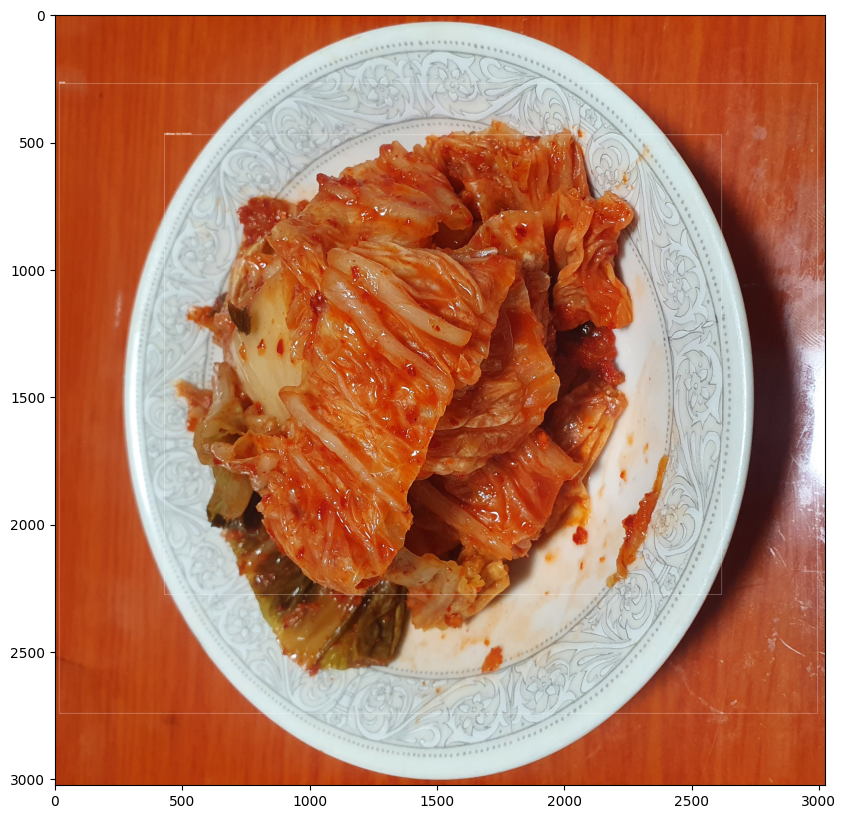

In [31]:
random.seed()

# class_id_mapping 한거 쓰기
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize=(10,10))
    plt.imshow(np.array(image))
    plt.show()

# 임의의 주석 파일(annotation) 불러오기
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


image_file = annotation_file.replace("annotations", "images").replace("txt", "jpg")
assert os.path.exists('food_data/images')

# 이미지 받아오기
image = Image.open(image_file)

# 경계 박스 만들기.
plot_bounding_box(image, annotation_list)

In [32]:
# Read images and annotations
images = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images')]
annotations = [os.path.join('food_data/annotations', x) for x in os.listdir('food_data/annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [45]:
# 자료를 넣어둔 파일에 images 에는 train, val, test를 넣어두고
# annotaions에도train, val, test 만들어두기
# 그리고 만들어둔 애들 보내주기

#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, 'food_data/images/train/')
move_files_to_folder(val_images, 'food_data/images/val/')
move_files_to_folder(test_images, 'food_data/images/test/')
move_files_to_folder(train_annotations, 'food_data/annotations/train/')
move_files_to_folder(val_annotations, 'food_data/annotations/val/')
move_files_to_folder(test_annotations, 'food_data/annotations/test/')

# 다끝나고 annotaion 파일의 이름을  labels로 바꾸면 됩니다!

C:\Users\smhrd


'mv'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


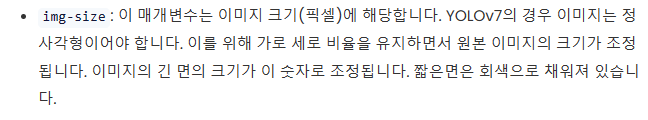
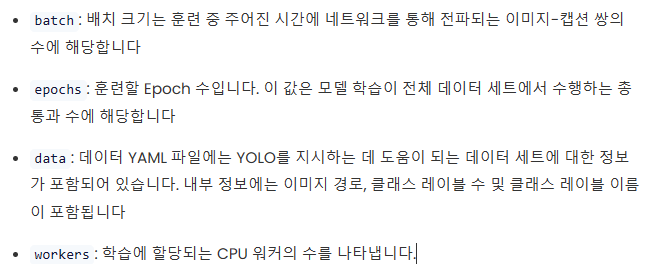
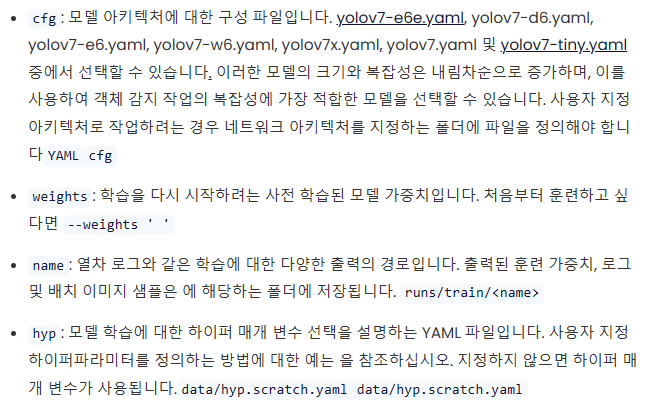

In [5]:
%cd ..

C:\Users\smhrd\yolov7


In [6]:
# 학습 시켜볼까요?
!python train.py --img-size 640 --cfg cfg/training/yolov7.yaml --hyp data/hyp.scratch.custom.yaml --batch 8 --epochs 100 --data data/food_check.yaml --weights yolov7_training.pt --workers 24

^C


In [12]:
torch.cuda.is_available()

True